In [23]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, normalized_mutual_info_score, rand_score, confusion_matrix
Outils
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from adjustText import adjust_text
from statistics import stdev
import anndata
from adjustText import adjust_text

In [24]:
# Input path of the reference/raw data
PATH_PROJECT = "/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM"
PATH_EXPERIMENT = os.path.join( PATH_PROJECT, "cross_tissue_immune_cell")
PATH_EXPERIMENT_REFERENCE = os.path.join( PATH_EXPERIMENT, "01_Reference")
PATH_EXPERIMENT_REFERENCE_EXTRA = os.path.join( PATH_EXPERIMENT_REFERENCE, "00_Dataset")

PATH_MODEL = os.path.join( PATH_EXPERIMENT_REFERENCE, "04_Model")
PATH_MODEL_SCBERT_EXTRA = os.path.join( PATH_MODEL, "panglao_pretrain.pth")

PATH_FILE_SCBERT = os.path.join( PATH_MODEL, "scBERT-master")
PATH_FILE_FINETUNE = os.path.join( PATH_FILE_SCBERT, "finetune.py")
PATH_FILE_PREDICT = os.path.join( PATH_FILE_SCBERT, "predict.py")

# Output path of the pre processed dataset
PATH_EXPERIMENT_OUTPUT = os.path.join( PATH_EXPERIMENT, "05_Output")
SCBERT_OUTPUT = os.path.join( PATH_EXPERIMENT_OUTPUT, "06_scBERT") 

# Parameter for select the prediction that interest us 
RUN_ID = "01"
EPOCH=5
FOLD = 2

REPERTORIE_FILE_OUTPUT = os.path.join( SCBERT_OUTPUT, "Run_" + RUN_ID + "_epoch_" + str( EPOCH))
REPERTORIE_FILE_OUTPUT_EXTRA = os.path.join( REPERTORIE_FILE_OUTPUT, "Result_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH))
FILE_OUT_PUT = os.path.join( REPERTORIE_FILE_OUTPUT_EXTRA, "Cell_Type_Predict_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH) + ".txt")

ANALYSIS_NAME = os.path.join( PATH_EXPERIMENT_OUTPUT, "02b_FilterData") 
EXTRA_ANALYSIS_NAME_ANNDATA = os.path.join( ANALYSIS_NAME, "Preprocess_Anndata_File_scBERT") 

PATH_INPUT_FILE_TRAINING = os.path.join( EXTRA_ANALYSIS_NAME_ANNDATA, "Cross_Tissue_Training_FOLD_" + str( FOLD) + "_Preprocess.h5ad")
PATH_INPUT_FILE_TEST = os.path.join( EXTRA_ANALYSIS_NAME_ANNDATA, "Cross_Tissue_test_FOLD_" + str( FOLD) + "_Preprocess.h5ad")

BEST_MEAN_PREDICTION = 0.80
BEST_VARIANCE_PREDICTION = 0.02

WORST_MEAN_PREDICTION = 0.6
WORST_VARIANCE_PREDICTION = 0.05  

In [3]:
dataset_test = sc.read_h5ad(PATH_INPUT_FILE_TEST)

celltypes = dataset_test.obs.celltype.unique()

In [25]:
results_scBERT_seperate = []
results_scBERT_sort = []

# Read the file, and seperate all the word different in the file
with open(FILE_OUT_PUT,'r') as f:
    for line in f:
        for word in line.split("\'"):
            results_scBERT_seperate.append(word)

# Sort the file, without the noise
for word in results_scBERT_seperate :
    if len(word) != 2:
        if len(word) != 1:
            results_scBERT_sort.append(word)

In [26]:
accuracy = accuracy_score(dataset_test.obs.celltype, results_scBERT_sort)
precision = precision_score(dataset_test.obs.celltype, results_scBERT_sort, average="macro")
recall = recall_score(dataset_test.obs.celltype, results_scBERT_sort, average="macro")
macro_f1 = f1_score(dataset_test.obs.celltype, results_scBERT_sort, average="macro")
mutual_info_score = normalized_mutual_info_score(dataset_test.obs.celltype, results_scBERT_sort)
rand_index = rand_score(dataset_test.obs.celltype, results_scBERT_sort)

print('Accuracy : ', accuracy , "\n", "Precision : ", precision, "\n" ,"Recall : ", recall, "\n" ,"F1 Score : ", macro_f1, "\n", "Mutual Info : ", mutual_info_score, "\n", "Rand Index : ", rand_index, sep = '')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy : 0.8647378157886756
Precision : 0.8068838303920314
Recall : 0.7453323938810112
F1 Score : 0.7688300199796323
Mutual Info : 0.8091673538230151
Rand Index : 0.9750887691900617


In [27]:
                    # Montre comment est attribué le nombre de type cellulaires sur le nombre total
#for x in range (0, len(celltypes)):
#    acc = 0
#    for i in range (0, len(results_scBERT_sort)):
#        if celltypes[x] == results_scBERT_sort[i] :
#            acc = acc + 1
#    print(celltypes[x], " | ", acc / (np.sum(dataset_test.obs.celltype == celltypes[x])), sep ='')

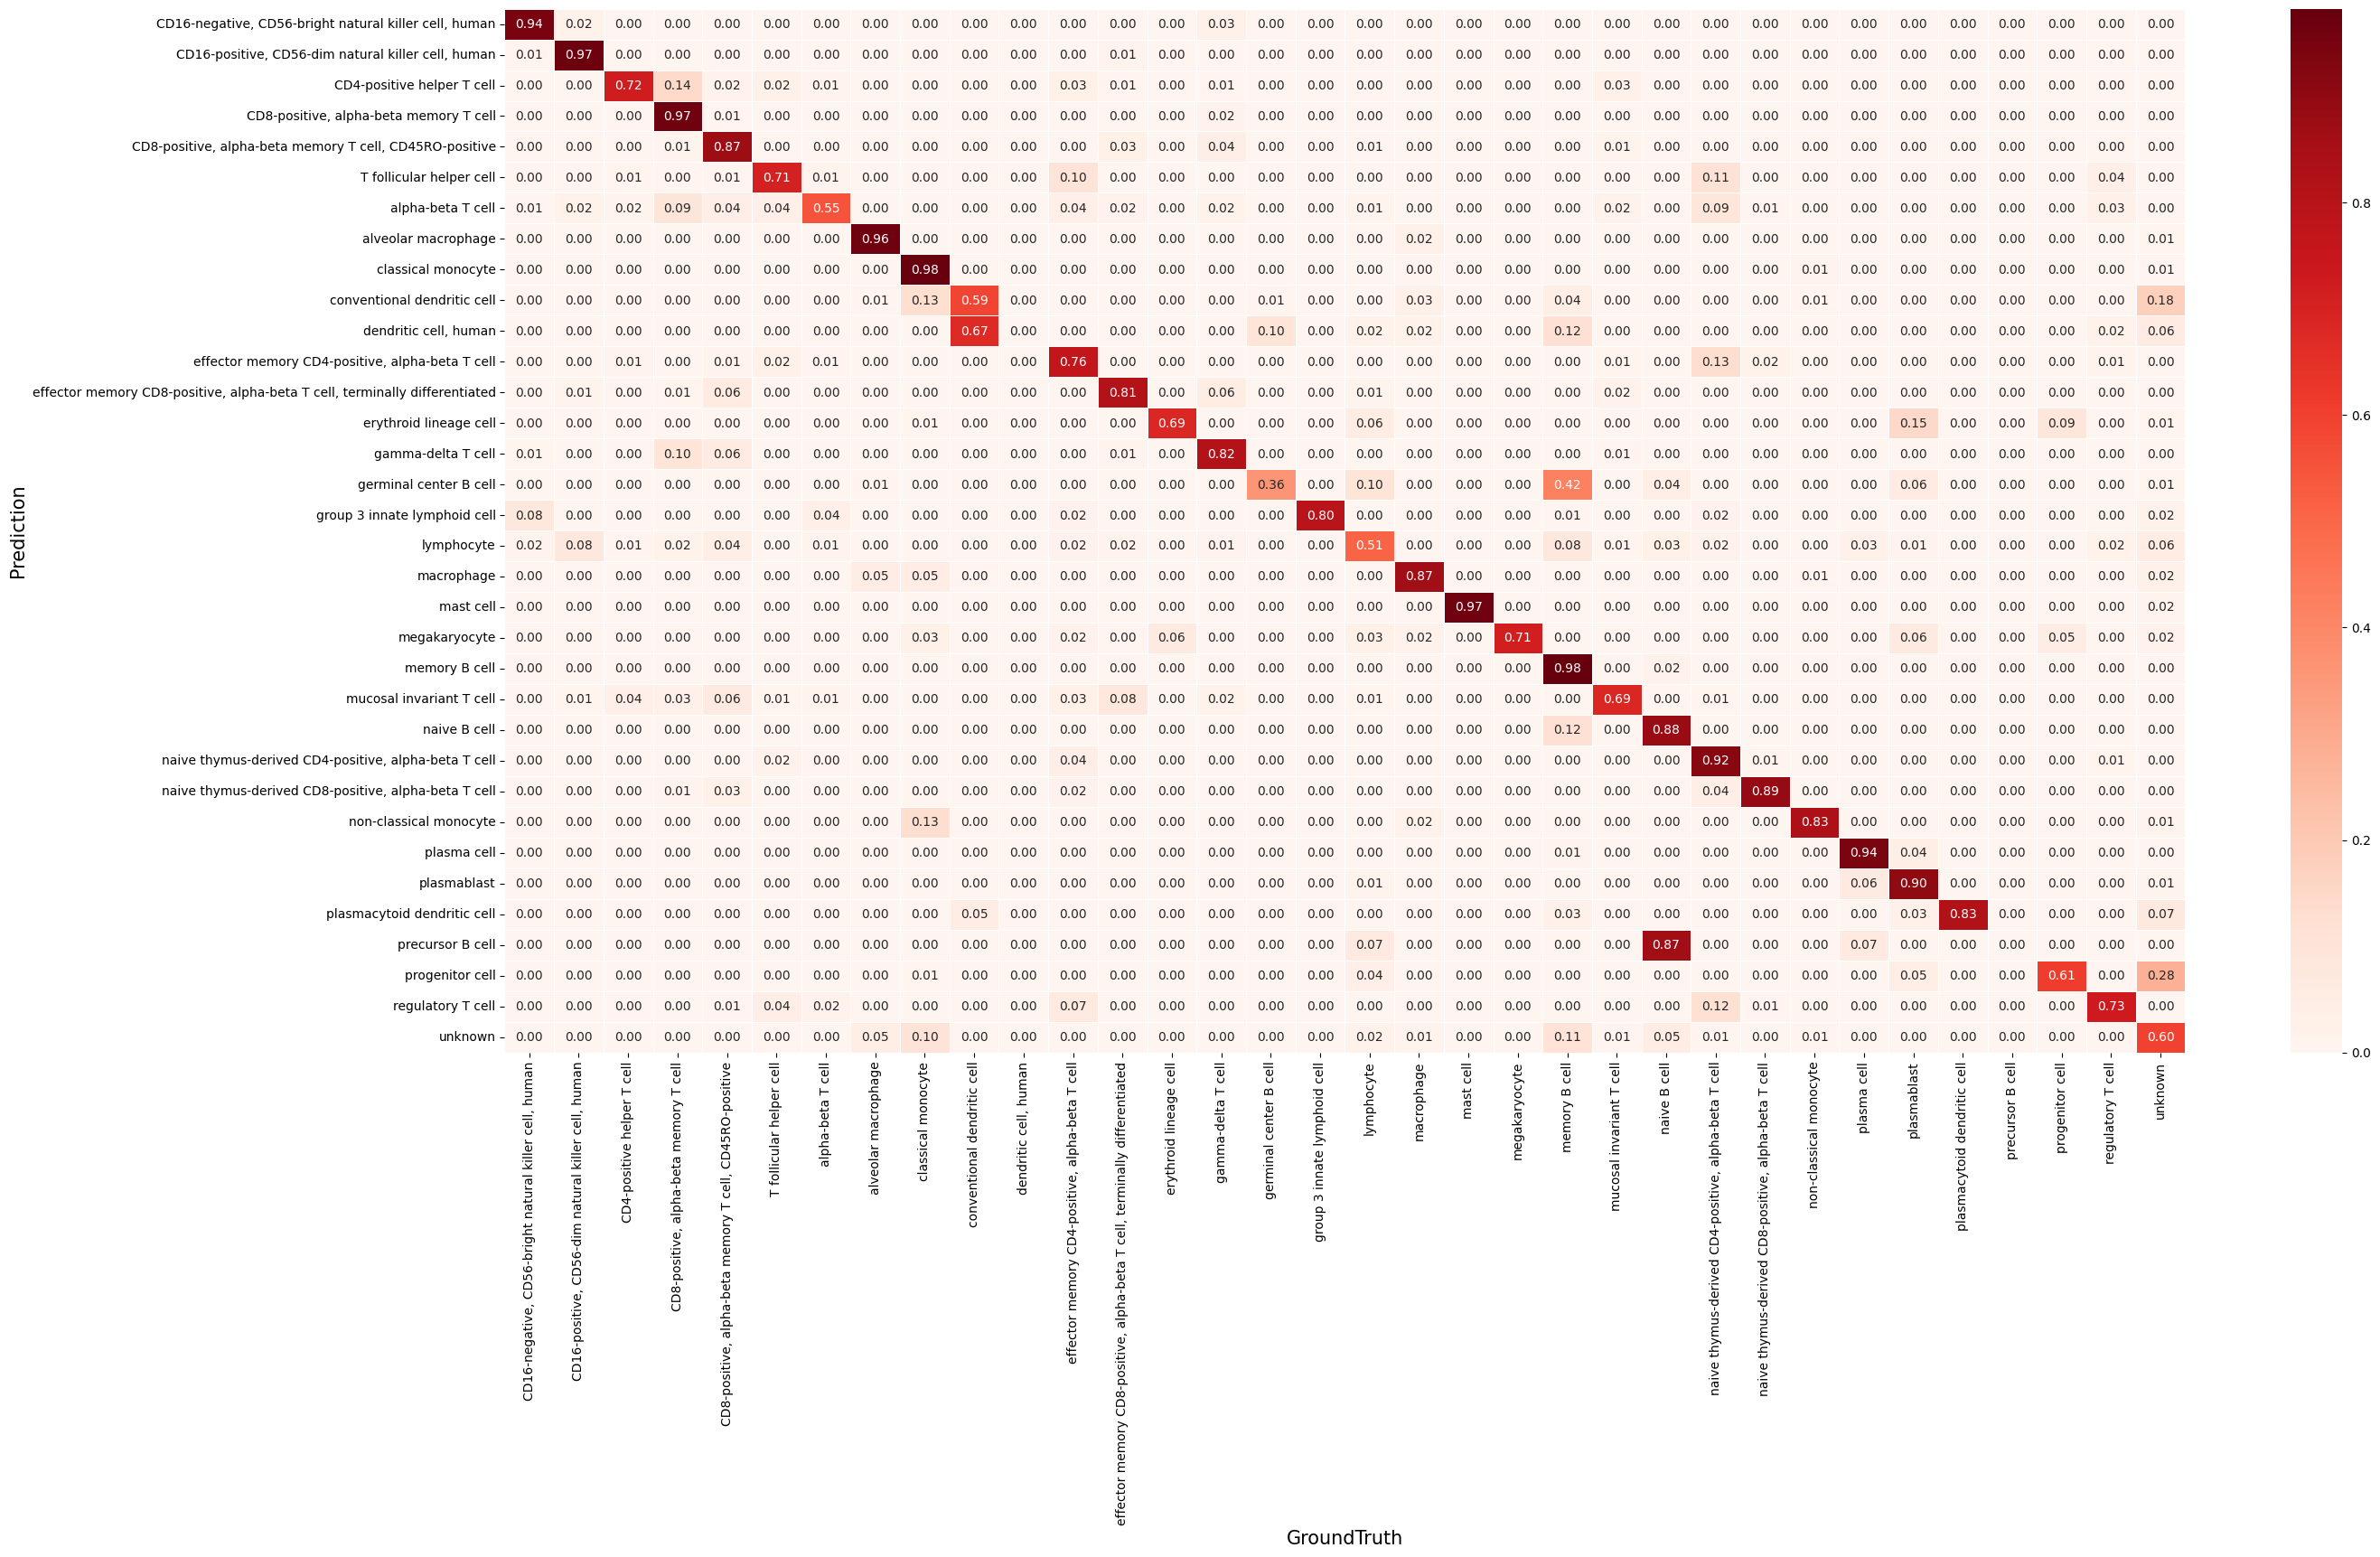

In [28]:
labels = np.unique(dataset_test.obs.celltype)
cm = confusion_matrix(dataset_test.obs.celltype, results_scBERT_sort)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm = pd.DataFrame(cm, index = labels, columns = labels)
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".2f", ax=ax, cmap="Reds")
# ax.tick_params(axis = 'x', labelsize = 10) #Changes the size of cell type names
plt.xlabel('GroundTruth', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

### Figure

In [21]:
mydict = {'Accuracy':[], 'Precision':[], 'Recall':[], 'Macro F1':[], 'MI':[], 'RI':[], 'Bloc':[]}
# Parameters for select the name that we instered
RUN_ID = "02"
EPOCH = 10
# File where we get the file pre process.
EXTRA_FILE_NAME_ANNDATA = os.path.join( EXTRA_ANALYSIS_NAME_ANNDATA, "Run_00") 

for FOLD in range (0, 5):
    REPERTORIE_FILE_OUTPUT = os.path.join( SCBERT_OUTPUT, "Run_" + RUN_ID + "_epoch_" + str( EPOCH))
    REPERTORIE_FILE_OUTPUT_EXTRA = os.path.join( REPERTORIE_FILE_OUTPUT, "Result_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH))
    FILE_OUT_PUT = os.path.join( REPERTORIE_FILE_OUTPUT_EXTRA, "Cell_Type_Predict_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH) + ".txt")
    PATH_INPUT_FILE_TEST = os.path.join( EXTRA_FILE_NAME_ANNDATA, "Cross_Tissue_test_FOLD_" + str( FOLD) + "_Preprocess.h5ad")

    # We take the output file, and clean it up, as it's impossible to read the file otherwise.
    results_scBERT_seperate = []
    results_scBERT_sort = []
    with open(FILE_OUT_PUT,'r') as f:
        for line in f:
            for word in line.split("\'"):
                results_scBERT_seperate.append(word)
    for word in results_scBERT_seperate :
        if len(word) != 2:
            if len(word) != 1:
                results_scBERT_sort.append(word)
    # We take the test file which will be linked to the result file...
    Dataset_Human_First_Plot = sc.read_h5ad(PATH_INPUT_FILE_TEST)
    for k in mydict:
        if k=='Accuracy':
            mydict['Accuracy'].append(accuracy_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
        if k=='Precision':
            mydict['Precision'].append(precision_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
        if k=='Recall':                
            mydict['Recall'].append(recall_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
        if k =='Macro F1':          
            mydict['Macro F1'].append(f1_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
        if k=='MI':                
            mydict['MI'].append(normalized_mutual_info_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
        if k=='RI':                
            mydict['RI'].append(rand_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
        if k=='Bloc':                
            mydict['Bloc'].append('Bloc ' + str(FOLD))

indicator_result_run = pd.DataFrame(mydict)

,Accuracy,Precision,Recall,Macro F1,MI,RI,Bloc
0,0.887641,0.897620,0.858239,0.874130,0.835607,0.978603,Bloc 0
1,0.891637,0.903585,0.857256,0.876260,0.840269,0.978679,Bloc 1
2,0.890789,0.898740,0.843690,0.863143,0.836771,0.979329,Bloc 2
3,0.892669,0.899381,0.845947,0.863990,0.840537,0.979254,Bloc 3
4,0.879416,0.889169,0.820043,0.840043,0.826494,0.977358,Bloc 4


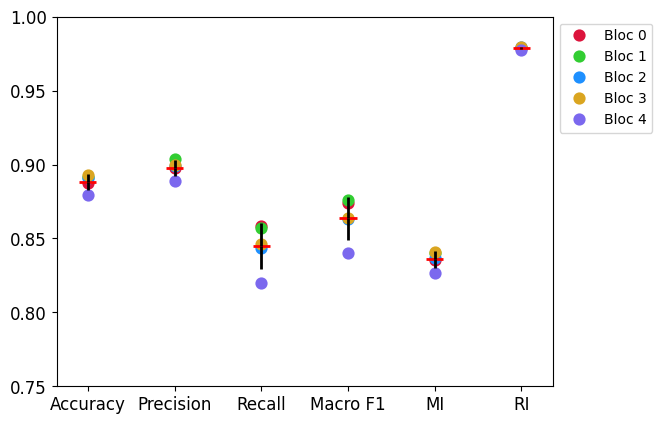

In [23]:
#| label: fig-pointplotindicator
#| fig-cap: "Point plot of values of the various indicators for all Folds supplied."

# Choice of colors for all folds (there must be as many colors as there are folds)
pattern_palette = {'Bloc 0': 'crimson', 'Bloc 1': 'limegreen', 'Bloc 2': 'dodgerblue', 'Bloc 3': 'goldenrod', 'Bloc 4':'mediumslateblue'}
# Create a new dataset to put the indicators, their folds and their values in columns for display in the graph.
df_indicator_result = indicator_result_run.melt(id_vars=['Bloc'], var_name='Indicator', value_name='Values')
# Point Plot of indicators and values, as a function of k_folds with mean and standard deviation.
sns.pointplot(data=df_indicator_result, x='Indicator', y='Values', linestyle='none', hue='Bloc', palette=pattern_palette)

# Add averages for each indicator
xmin=-0.1
xmax=0.1
for i in indicator_result_run:
    if i != "Bloc":
        plt.hlines(xmin=xmin, xmax=xmax ,y = indicator_result_run[i].mean(), colors='red', lw=2)
        xmax = xmax + 1
        xmin = xmin + 1

# Add standard deviations for each indicator
acc_coord_x = 0
for i in indicator_result_run:
    if i != "Bloc":
        Ecart_type_bas = indicator_result_run[i].mean() - stdev(indicator_result_run[i])
        Ecart_type_haut = stdev(indicator_result_run[i]) + indicator_result_run[i].mean()
        plt.vlines(x = acc_coord_x, ymin= indicator_result_run[i].mean(), ymax = Ecart_type_haut, colors='black', lw=2)
        plt.vlines(x = acc_coord_x, ymin= indicator_result_run[i].mean(), ymax = Ecart_type_bas, colors='black', lw=2)
        acc_coord_x = acc_coord_x + 1

        
# Change the parameter for the plot.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0.75, 1)
plt.xlabel("", fontsize=0) #Remove the name that don't interest us
plt.ylabel("", fontsize=0.1) #Remove the name that don't interest us
plt.xticks(fontsize=12) #change the size of label xtick
plt.yticks(fontsize=12) #change the size of label ytick

#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/fig/Cross_Tissue_Fold_Basic_epoch_10_scBERT.png', bbox_inches='tight')
plt.show()

In [24]:
#| label: fig-tablematrix
#| fig-cap: "Table of all the values of the diagonals of the confusion matrices for the different Folds, with mean and variance."

df_diagonal_value_matrix_epoch_1 = pd.DataFrame()

for FOLD in range (0, 5):
    REPERTORIE_FILE_OUTPUT = os.path.join( SCBERT_OUTPUT, "Run_" + RUN_ID + "_epoch_" + str( EPOCH))
    REPERTORIE_FILE_OUTPUT_EXTRA = os.path.join( REPERTORIE_FILE_OUTPUT, "Result_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH))
    FILE_OUT_PUT_2 = os.path.join( REPERTORIE_FILE_OUTPUT_EXTRA, "Cell_Type_Predict_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH) + ".txt")
    PATH_INPUT_FILE_TEST_2 = os.path.join( EXTRA_FILE_NAME_ANNDATA, "Cross_Tissue_test_FOLD_" + str( FOLD) + "_Preprocess.h5ad")
    anndata_point_value = sc.read_h5ad(PATH_INPUT_FILE_TEST_2)
    
    results_scBERT_seperate = []
    results_scBERT_sort = []
    # Read the file, and seperate all the word different in the file
    with open(FILE_OUT_PUT_2,'r') as f:
        for line in f:
            for word in line.split("\'"):
                results_scBERT_seperate.append(word)
    # Sort the file, without the noise
    for word in results_scBERT_seperate :
        if len(word) != 2:
            if len(word) != 1:
                results_scBERT_sort.append(word)

    labels = np.unique(anndata_point_value.obs.celltype)
    cm = confusion_matrix(anndata_point_value.obs.celltype, results_scBERT_sort)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    cm = pd.DataFrame(cm, index = labels, columns = labels)
    
    # The index is stored in our dataframe in a column named “CellType”.
    df_diagonal_value_matrix_epoch_1["CellType"] = cm.index
    # We store the set of values present in the diagonal of the matrix in the column named K_Fold_ and its name
    df_diagonal_value_matrix_epoch_1["Bloc_" + str(FOLD)] = np.diag(cm)
        
# We replace the matrix index with the cell type names
df_diagonal_value_matrix_epoch_1.index = df_diagonal_value_matrix_epoch_1['CellType']
# We remove the cell type column, which is now in the index, to have only numerical values.
del df_diagonal_value_matrix_epoch_1['CellType']

df_diagonal_value_matrix_epoch_1['Variance'] = df_diagonal_value_matrix_epoch_1.var(axis='columns')
df_diagonal_value_matrix_epoch_1['Mean'] = df_diagonal_value_matrix_epoch_1.loc[:,[c for c in df_diagonal_value_matrix_epoch_1.columns if c!= "Variance"]].mean(axis=1)


# We need back "Cell_Type" in a column different that index.
df_diagonal_value_matrix_epoch_1['Cell_Type'] = df_diagonal_value_matrix_epoch_1.index

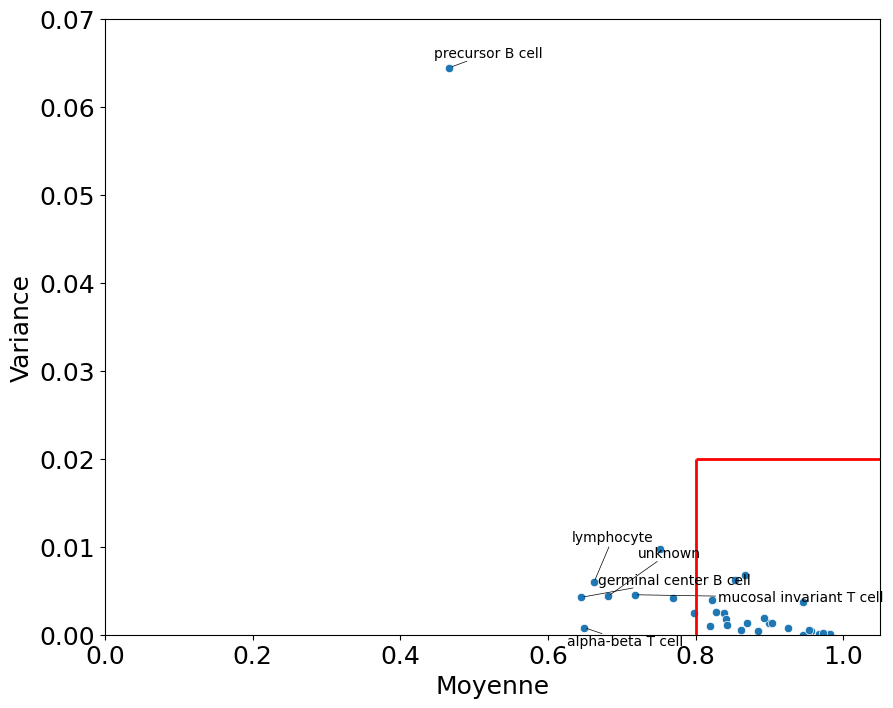

In [28]:
# Modifie the size of the plot
fig, ax = plt.subplots(figsize = (10,8))
# We create the graph with the value
sns.scatterplot(data=df_diagonal_value_matrix_epoch_1, x="Mean", y="Variance") # Alternative sns.scatterplot(data=df_diagonal_value_matrix, x="Mean", y="Variance")
# set labels

# Put the line inside the graph for the wors and bad prediction
plt.hlines(xmin=BEST_MEAN_PREDICTION, xmax=1.05 ,y = BEST_VARIANCE_PREDICTION, colors='red', lw=2)
plt.vlines(x=BEST_MEAN_PREDICTION, ymin = 0, ymax=BEST_VARIANCE_PREDICTION, colors='red', lw=2)

### For loop to put the name of some cell types
# Create accumulator to modify the position of the name and so not overlap.

texts = []
for idx, row in df_diagonal_value_matrix_epoch_1.iterrows():
    # Select the cell type who gonna have their name on top of them
    if row['Mean'] < 0.75 or row['Variance'] > 0.05:
        # Annotate
        texts.append(plt.text(row['Mean'], row['Variance'], row['Cell_Type']))

adjust_text(texts, expand=(1.2, 2), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5, )) # ensure the labeling is clear by adding arrows)

# Change the parameter for the plot.
plt.ylim(0,0.07)
plt.xlim(0,1.05)
ax.set_xlabel("Moyenne", fontsize=18)
ax.set_ylabel("Variance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/fig/Cross_Tissue_Mean_Var_run_epoch_10_scBERT.png', bbox_inches='tight')
plt.show()

#### Run at different epoch (fig 2)

In [25]:
#| label: fig-runepoch1
#| fig-cap: "Graph of different indicators for epoch 1."

dict_fig_2 = {'Accuracy':[], 'Precision':[], 'Recall':[], 'Macro F1':[], 'MI':[], 'RI':[], 'Bloc':[]}
results_run_epoch5=[]
index_2 = []
variance_fold_2 = []
indicator_result_run = ''

EPOCH = 10

for i in range (6,9) : # Put the number for select the epoch that interest us. In this case we select epoch 10.
    RUN_ID = '0' + str(i)
    RUN_ID_PATH_FILE = '0' + str(i - 6)
    ## Index is for create a new column by naming the various averages according to their epoch (WARNING: THIS NAMES IN ORDER OF ENTRY (folders must therefore be arranged upstream)).
    if i < 3 :
        index_2.append("Run_0" + str(i) + "_epoch_1")
    elif i >= 3 and i <= 5:
        index_2.append("Run_0" + str(i) + "_epoch_5")
    else :
        index_2.append("Run_0" + str(i) + "_epoch_10")
    for FOLD in range (0, 5):
        REPERTORIE_FILE_OUTPUT = os.path.join( SCBERT_OUTPUT, "Run_" + RUN_ID + "_epoch_" + str( EPOCH))
        REPERTORIE_FILE_OUTPUT_EXTRA = os.path.join( REPERTORIE_FILE_OUTPUT, "Result_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH))
        EXTRA_FILE_NAME_ANNDATA = os.path.join( EXTRA_ANALYSIS_NAME_ANNDATA, "Run_" + RUN_ID_PATH_FILE) 
        FILE_OUT_PUT = os.path.join( REPERTORIE_FILE_OUTPUT_EXTRA, "Cell_Type_Predict_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH) + ".txt")
        PATH_INPUT_FILE_TEST = os.path.join( EXTRA_FILE_NAME_ANNDATA, "Cross_Tissue_test_FOLD_" + str( FOLD) + "_Preprocess.h5ad")

        # We take the output file, and clean it up, as it's impossible to read the file otherwise.
        results_scBERT_seperate = []
        results_scBERT_sort = []
        with open(FILE_OUT_PUT,'r') as f:
            for line in f:
                for word in line.split("\'"):
                    results_scBERT_seperate.append(word)
        for word in results_scBERT_seperate :
            if len(word) != 2:
                if len(word) != 1:
                    results_scBERT_sort.append(word)
        # We take the test file which will be linked to the result file...
        Dataset_Human_First_Plot = sc.read_h5ad(PATH_INPUT_FILE_TEST)
        for k in dict_fig_2:
            if k=='Accuracy':
                dict_fig_2['Accuracy'].append(accuracy_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
            if k=='Precision':
                dict_fig_2['Precision'].append(precision_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k=='Recall':                
                dict_fig_2['Recall'].append(recall_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k =='Macro F1':          
                dict_fig_2['Macro F1'].append(f1_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k=='MI':                
                dict_fig_2['MI'].append(normalized_mutual_info_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
            if k=='RI':                
                dict_fig_2['RI'].append(rand_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
            if k=='Bloc':                
                dict_fig_2['Bloc'].append('Bloc ' + str(FOLD))
    # We stock every value from one run and every fold inside fold, after we delete the column 'bloc' to be able to do the mean of value and add it to a list (And this is a for loop, so we going to get that 3 times in this example).
    indicator_result_run = pd.DataFrame(dict_fig_2)
    del indicator_result_run["Bloc"]
    results_run_epoch5.append(indicator_result_run.mean())

# Create dataframe to be able to use sns pointplot
results_run_epoch5 = pd.DataFrame(np.vstack(results_run_epoch5))
results_run_epoch5.columns = indicator_result_run.columns
results_run_epoch5["run"] = index_2

/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/02b_FilterData/Preprocess_Anndata_File_scBERT/Run_00/Cross_Tissue_test_FOLD_0_Preprocess.h5ad
/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/06_scBERT/Run_06_epoch_10/Result_FOLD_0_epoch_10/Cell_Type_Predict_FOLD_0_epoch_10.txt
/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/02b_FilterData/Preprocess_Anndata_File_scBERT/Run_00/Cross_Tissue_test_FOLD_1_Preprocess.h5ad
/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/06_scBERT/Run_06_epoch_10/Result_FOLD_1_epoch_10/Cell_Type_Predict_FOLD_1_epoch_10.txt
/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/02b_FilterData/Preprocess_Anndata_File_scBERT/Run_00/Cross_Tissue_test_FOLD_2_Preprocess.h5ad
/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/06_s

In [26]:
results_run_epoch5

,Accuracy,Precision,Recall,Macro F1,MI,RI,run
0,0.888430,0.897699,0.845035,0.863513,0.835936,0.978644,Run_06_epoch_10
1,0.888656,0.897470,0.848480,0.866023,0.835856,0.978848,Run_07_epoch_10


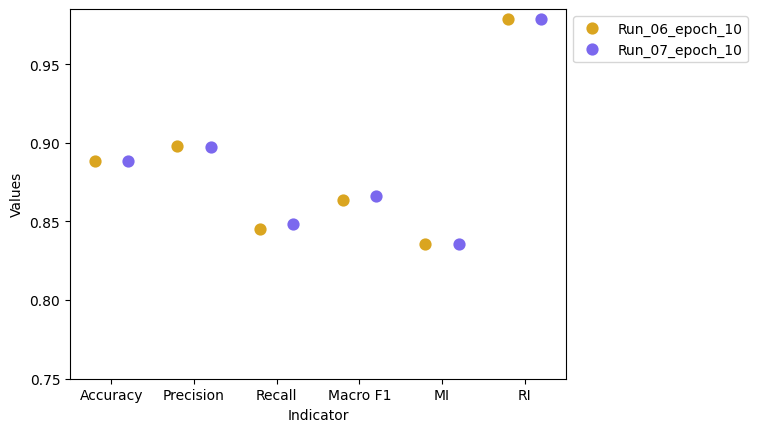

In [29]:
pattern_palette_2 = {"Run_06_epoch_10": 'goldenrod', "Run_07_epoch_10": 'mediumslateblue'} # , "Run_01_epoch_1": 'crimson', "Run_02_epoch_1": 'crimson'
df_indicator_result_2 = results_run_epoch5.melt(id_vars=['run'], var_name='Indicator', value_name='Values')
fig, ax = plt.subplots()
sns.pointplot(data=df_indicator_result_2, x='Indicator', y='Values', linestyle='none', hue='run', palette=pattern_palette_2, dodge=0.4)

ax.set_ylim(0.750, 0.985)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/fig/fig_different_run_epoch_10_miss_one_scBERT.png', bbox_inches='tight')
plt.show()

In [1]:
results = []
variance_fold = []
index = []

# For loop that does the same as the code above, except that it retrieves all runs with all folds present in a run
for i in range (0,9): 
    RUN_ID = '0' + str(i)
    dict_different_epoch = {'Accuracy':[], 'Precision':[], 'Recall':[], 'Macro F1':[], 'MI':[], 'RI':[], 'Bloc':[]}
    # The condictions will allow you to map the code to the right variables, notably the number of epochs. But also the RUN_ID_PATH_FILE, which allows you to retrieve the predictions with the folds corresponding to the pre-process of the datats used for the prediction.
    for FOLD in range (0, 5):
        if i < 3 :
            EPOCH = 1
            if i == 0 :
                RUN_ID_PATH_FILE = '00'
            elif i == 1 :
                RUN_ID_PATH_FILE = '01'
            elif i == 2 :
                RUN_ID_PATH_FILE = '02'
        elif i < 6 and i > 2 :
            EPOCH = 5
            if i == 3 :
                RUN_ID_PATH_FILE = '00'
            elif i == 4 :
                RUN_ID_PATH_FILE = '01'
            elif i == 5 :
                RUN_ID_PATH_FILE = '02'
        elif i > 5 :
            EPOCH = 10
            if i == 6 :
                RUN_ID_PATH_FILE = '00'
            elif i == 7 :
                RUN_ID_PATH_FILE = '01'
            elif i == 8 :
                RUN_ID_PATH_FILE = '02'
        # Same principle and code above
        REPERTORIE_FILE_OUTPUT = os.path.join( SCBERT_OUTPUT, "Run_" + RUN_ID + "_epoch_" + str( EPOCH))
        REPERTORIE_FILE_OUTPUT_EXTRA = os.path.join( REPERTORIE_FILE_OUTPUT, "Result_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH))
        FILE_OUT_PUT = os.path.join( REPERTORIE_FILE_OUTPUT_EXTRA, "Cell_Type_Predict_FOLD_" + str( FOLD) + "_epoch_" + str( EPOCH) + ".txt")

        EXTRA_FILE_NAME_ANNDATA = os.path.join( EXTRA_ANALYSIS_NAME_ANNDATA, "Run_" + RUN_ID_PATH_FILE) 
        PATH_INPUT_FILE_TEST = os.path.join( EXTRA_FILE_NAME_ANNDATA, "Cross_Tissue_test_FOLD_" + str( FOLD) + "_Preprocess.h5ad")
        
        results_scBERT_seperate = []
        results_scBERT_sort = []
        with open(FILE_OUT_PUT,'r') as f:
            for line in f:
                for word in line.split("\'"):
                    results_scBERT_seperate.append(word)
        for word in results_scBERT_seperate :
            if len(word) != 2:
                if len(word) != 1:
                    results_scBERT_sort.append(word)

        Dataset_Human_First_Plot = sc.read_h5ad(PATH_INPUT_FILE_TEST)
        for k in dict_different_epoch:
            if k=='Accuracy':
                dict_different_epoch['Accuracy'].append(accuracy_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
            if k=='Precision':
                dict_different_epoch['Precision'].append(precision_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k=='Recall':                
                dict_different_epoch['Recall'].append(recall_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k =='Macro F1':          
                dict_different_epoch['Macro F1'].append(f1_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort, average="macro"))
            if k=='MI':
                if normalized_mutual_info_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort) != 0 :
                    dict_different_epoch['MI'].append(normalized_mutual_info_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
                else :
                    dict_different_epoch['MI'].append(0)
            if k=='RI':                
                dict_different_epoch['RI'].append(rand_score(Dataset_Human_First_Plot.obs.celltype, results_scBERT_sort))
            if k=='Bloc':                
                dict_different_epoch['Bloc'].append('Bloc ' + str(FOLD))
    
    indicator_result_run_different_epoch = pd.DataFrame(dict_different_epoch)
    del indicator_result_run_different_epoch["Bloc"]
    results.append(indicator_result_run_different_epoch.mean())
    variance_fold.append(stdev(indicator_result_run_different_epoch["Accuracy"]))

# We transform our list into a dataframe
results = pd.DataFrame(np.vstack(results))
# The new dataframe takes the same column names as the previous files
results.columns = indicator_result_run.columns

# For loop to create a new column by naming the various averages according to their epoch (WARNING: THIS NAMES IN ORDER OF ENTRY (folders must therefore be arranged upstream)).
for i in range(0,9):
    if i < 3 :
        index.append("Run_0" + str(i) + "_epoch_1")
    elif i >= 3 and i <= 5:
        index.append("Run_0" + str(i) + "_epoch_5")
    else :
        index.append("Run_0" + str(i) + "_epoch_10")

# Creation of category to apply different names.
results["run"] = index

NameError: name 'os' is not defined

In [ ]:
# Defines chart size
results.loc[0, "run"] = 'Run Epoch 1 '
results.loc[1, "run"] = ' Run Epoch 1'
results.loc[2, "run"] = ' Run Epoch 1 '
results.loc[3, "run"] = 'Run Epoch 5 '
results.loc[4, "run"] = ' Run Epoch 5'
results.loc[5,"run"] = ' Run Epoch 5 '
results.loc[6,"run"] = 'Run Epoch 10 '
results.loc[7, "run"] = ' Run Epoch 10'
results.loc[8, "run"] = ' Run Epoch 10 '

In [ ]:
pattern_palette_4 = {"Run Epoch 1 ": 'crimson', " Run Epoch 1": 'crimson', "Run Epoch 5 ":"goldenrod", " Run Epoch 5":"goldenrod", "Run Epoch 5 ":'goldenrod',"Run Epoch 10 ":'mediumslateblue', " Run Epoch 10":"mediumslateblue"} #crimson, limegreen, dodgerblue, goldenrod, mediumslateblue

fig,ax = plt.subplots(figsize=(6,4))
# We set up and draw the graph with the values 
sns.pointplot(data=results, x='run', y='Accuracy', linestyle='none', palette=pattern_palette_4, hue='run')
# Defines the size of the axes (in our case, only the y axis)
ax.set(ylim=(0.895, 0.95))

# For loop reading the list of variances, which adds these infromations to the graph.
acc_coord_x = 0
for i in range (0, len(variance_fold)):
    Ecart_type_bas = results["Accuracy"][i] - variance_fold[i]
    Ecart_type_haut = results["Accuracy"][i] + variance_fold[i]
    plt.vlines(x = acc_coord_x, ymin= results["Accuracy"][i], ymax = Ecart_type_haut, colors='black', lw=2)
    plt.vlines(x = acc_coord_x, ymin= results["Accuracy"][i], ymax = Ecart_type_bas, colors='black', lw=2)
    acc_coord_x = acc_coord_x + 1

# We recreate a line to place just a legend
plt.ylim([0.1, 0.935])
ax.set_xlabel("", fontsize=1)
plt.xticks(rotation=45)
#plt.savefig('/mnt/DOSI/PLATEFORMES/BIOINFORMATIQUE/04_PROJECT/scLLM/cross_tissue_immune_cell/05_Output/fig/fig_all_epoch_scBERT_cross_tissue_good.png.png', bbox_inches='tight')
plt.show()